**Credits:** *Alessio Desogus*

# CS 401 - Applied Data Analysis 2023

## Initialisation of the Notebook

### Imports

In [ ]:
# Data Manipulation Libraries
import pickle
import pandas as pd
import numpy as np
from numpy.random import seed as random_seed
from numpy.random import shuffle as random_shuffle
import math
from collections import Counter
from os import listdir
import os, codecs, string, random
from numpy.random import randint

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date, time
from dateutil.parser import parse
from pandas.plotting import scatter_matrix
from tqdm.notebook import tqdm

# Web parsing Libraries
import requests
from bs4 import BeautifulSoup

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cosine
from scipy.spatial.distance import jaccard
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegressionCV

# NLP Libraries
import spacy, nltk, gensim, sklearn
import pyLDAvis.gensim
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from gensim.models.phrases import Phrases
import re

# Statistics
from scipy.stats import ttest_ind
from scipy.stats import wilcoxon
from scipy.stats import kstest
from scipy.stats import pearsonr
from sklearn.feature_selection import mutual_info_classif
import itertools

# Graphs
import networkx as nx
from operator import itemgetter
from community import community_louvain
import collections
from networkx.algorithms.community.centrality import girvan_newman

# Big Data Libraries
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext

### Read Files

####  .CSV 

#### .JSON

#### .TXT

In [ ]:
import json
import pandas as pd

tweets_data_path = './Data/twitter_data.txt'
tweets_data = []

with open(tweets_data_path, "r") as tweets_file:
    for line in tweets_file:
        try:
            tweet = json.loads(line)
            tweets_data.append(tweet)
        except:
            continue

In [ ]:
tweets = pd.DataFrame()

fields = ['text','lang']
for f in fields:
    tweets[f] = list(map(lambda tweet: tweet[f], tweets_data))

tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))
tweets['username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['followers_count'] = list(map(lambda tweet: tweet['user']['followers_count'], tweets_data))
tweets['time_zone'] = list(map(lambda tweet: tweet['user']['time_zone'], tweets_data))

tweets['text_len'] = list(map(lambda tweet: len(tweet), tweets['text']))

print('We got',len(tweets_data),'tweets.')

We got 10698 tweets.


### Comment command

<span style="color:royalblue"> 
        Command to make comments distinguishable
</span>

<span style="color:royalblue">    
    
</span>

## 00 - Intro to Tools

### Jupyter notebooks features overview
It is possible to use **bold**, *itallic*, and `verbatim`.

### Built-in Help

In [ ]:
np.linspace?

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7f927ee9d940>
File:            ~/anaconda3/envs/ada/lib/python3.9/site-packages/numpy/core/function_base.py
Docstring:      
Return evenly spaced numbers over a specified interval.

Returns `num` evenly spaced samples, calculated over the
interval [`start`, `stop`].

The endpoint of the interval can optionally be excluded.

.. versionchanged:: 1.16.0
    Non-scalar `start` and `stop` are now supported.

.. versionchanged:: 1.20.0
    Values are rounded towards ``-inf`` instead of ``0`` when an
    integer ``dtype`` is specified. The old behavior can
    still be obtained with ``np.linspace(start, stop, num).astype(int)``

Parameters
----------
start : array_like
    The starting value of the sequence.
stop : array_like
    The end

The following let's you get even more information and look a the source code.

In [ ]:
np.linspace??

Signature:      
np.linspace(
    start,
    stop,
    num=50,
    endpoint=True,
    retstep=False,
    dtype=None,
    axis=0,
)
Call signature:  np.linspace(*args, **kwargs)
Type:            _ArrayFunctionDispatcher
String form:     <function linspace at 0x7f927ee9d940>
File:            ~/anaconda3/envs/ada/lib/python3.9/site-packages/numpy/core/function_base.py
Source:         
@array_function_dispatch(_linspace_dispatcher)
def linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None,
             axis=0):
    """
    Return evenly spaced numbers over a specified interval.

    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].

    The endpoint of the interval can optionally be excluded.

    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.

    .. versionchanged:: 1.20.0
        Values are rounded towards ``-inf`` instead of ``0`` when an
        integer ``dtype`` is specified. The old behavior

### Runtime Command

One can for example use the `%timeit` magic to compare the runtime of two pieces of code. For example, let's compare a pure Python recursive implementation of the factorial to an implementation using numpy vector routines.

In [ ]:
%timeit factorial_1(100)

18.4 µs ± 4.24 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%timeit factorial_2(100)

6.34 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


### Latex Equations 

IPython notebooks allow to display equations just by typing in latex. For example, we can write the famous Fourier transform equation as
$$
\int_{-\infty}^\infty f(t) e^{-i\omega t} dt.
$$

It is also possible to add some math in text, for example  a linear system $Ax = b$.

### Images

It is possible to include images in the notebooks, either by adding the HTML tags directly in a markdown cell such as the following:

<img src="https://www.epfl.ch/campus/services/communication/wp-content/uploads/2019/03/EPFL-Corp-ID-New-Visual-Identity-Logo.png" width=400>

or by using an IPython widget.

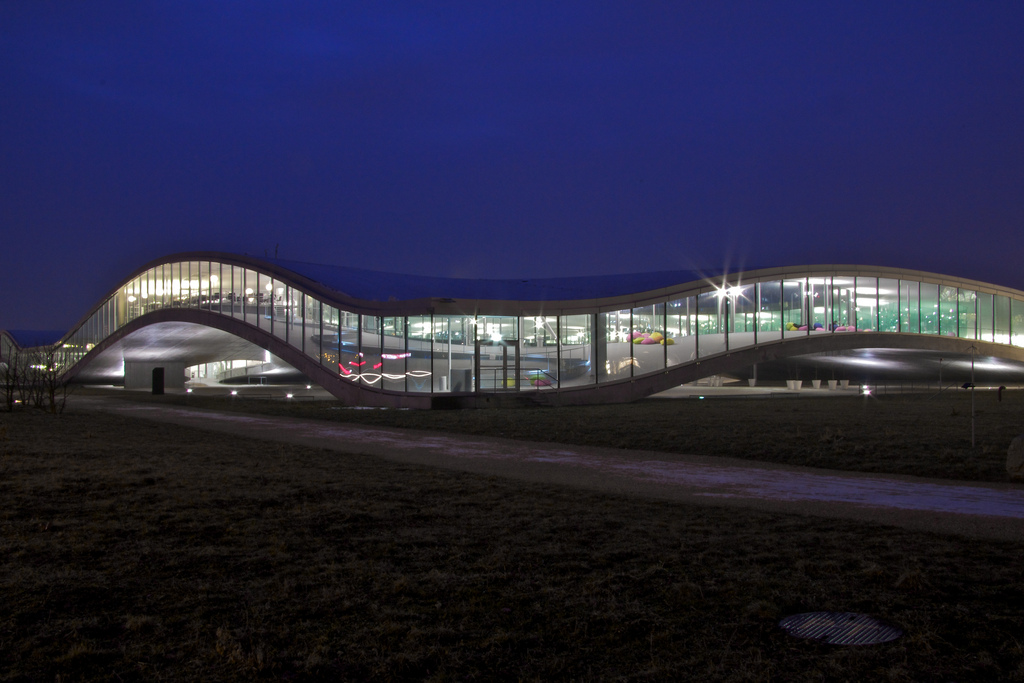

In [ ]:
from IPython.display import Image
# Photos credit: https://commons.wikimedia.org/wiki/File:Rolex_Learning_center.jpg
Image('./Data/rlc.jpg', width=800,height=600)

### Regexp Function (Regular expression operations)

In [ ]:
import re

# a helper function to apply the regexp
def word_in_text(words, text):
    words = re.sub('s+','s*', '|'.join(words))
    text = text.lower()
    match = re.search(words, text)
    if match:
        return True
    return False

In [ ]:
print(word_in_text(['open science','epfl'],'open science at epfl is great'))
print(word_in_text(['open science','epfl'],'open science is great'))
print(word_in_text(['open science','epfl'],'science is great'))

True
True
False


In [ ]:
# actually apply the regexp
keywords = ['open access', 'open science', 'ipython', 'open data', 'reproducible research','epfl']
for w in keywords:
    tweets[w] = tweets['text'].apply(lambda tweet: word_in_text([w], tweet))
    
tweets_by_kw = pd.Series([tweets[w].value_counts()[True] for w in keywords], index=keywords)

## 01 - Handling Data

## 02 - Data Visualisation and Data from the Web

## 03 - Describing Data

## 04 - Regression Analysis


## 05 - Causal Analysis of Observational Data

## 06 - Learning from Data - Supervised Learning

## 07 - Learning from Data - Applied Machine Learning

## 08 - Learning from Data - Unsupervised Learning

## 09 - Handling Text

## 10 - Handling Networks